# German Job Market Correlation and Regression Analysis.part2

#### 1.1 Imoprting Libraries
#### 1.2 Importing Dataset
#### 2. Data prep for regression analysis
#### 3. Regression analysis with extreme values
#### 3.1 Regression Salary Median vs. Industry_encoded
#### 3.2 Regression Salary Median vs. Job_title_encoded
#### 3.3 Regression Salary Median vs. Experience_level_encoded
#### 3.4 Regression Salary Median vs. Remote availibility_encoded

Note: I decided not to remove the extreme values in the salary because they are real values for high qualified jobs that offer high salary. i prefer to keep them in the regressoin model despite their low number.


## 1. Importing Libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [5]:
Jobmarket01= pd.read_excel(
    r'C:\Users\analy\Documents\German 2025 Job Market Analysis\02 Data\Original\Job Market Germany data set.xlsx'
)


In [7]:
Jobmarket01.head()

,year,month,job_title,industry,experience_level,salary_min_eur,salary_max_eur,salary_median_eur,number_of_openings,demand_index,...,seasonal_hiring_score,job_title_encoded,industry_encoded,city_encoded,state_encoded,education_requirement_encoded,job_type_encoded,skills_required_encoded,hiring_trend_encoded,season_encoded
0,2025,11,Data Scientist,IT,Entry,45635,63497,54566,25,64,...,4,4,8,0,2,3,1,8,2,0
1,2025,5,Nurse,Healthcare,Senior,63910,96906,80408,7,67,...,2,9,7,8,5,3,2,6,2,1
2,2025,12,Data Scientist,IT,Entry,31803,57265,44534,7,31,...,1,4,8,2,3,1,1,8,0,3
3,2025,9,Data Scientist,IT,Mid,44566,97954,71260,17,72,...,4,4,8,13,1,1,0,8,2,0
4,2025,1,Software Engineer,IT,Senior,93762,207782,150772,3,63,...,1,12,8,12,1,1,2,7,2,3


##### adding encoded column for the experience level to use it later in regression

In [8]:
# Using map() to replace each category with a number. encode Entry=0, Mid=1, Senior=2
Jobmarket01['experience_level_encoded'] = Jobmarket01['experience_level'].map({
    'Entry': 0,
    'Mid': 1,
    'Senior': 2
})

# Quick check
print(Jobmarket01[['experience_level', 'experience_level_encoded']].head())


  experience_level  experience_level_encoded
0            Entry                         0
1           Senior                         2
2            Entry                         0
3              Mid                         1
4           Senior                         2


##### adding encoded column for the Remote availibility to use it later in regression

In [15]:
# Using map() to replace each category with a number. encode No=0, Yes=1,
Jobmarket01['remote_availability_encoded'] = Jobmarket01['remote_availability'].map({
    'No': 0,
    'Yes': 1,
})

# Quick check
print(Jobmarket01[['remote_availability', 'remote_availability_encoded']].head())


  remote_availability  remote_availability_encoded
0                  No                            0
1                 Yes                            1
2                  No                            0
3                 Yes                            1
4                  No                            0


In [16]:
# saving the manipulated dataframe 
Jobmarket01.to_excel(
    r'C:\Users\analy\Documents\German 2025 Job Market Analysis\02 Data\Manipulated\Job Market Germany data set.xlsx'
)


## 2. Data prep for regression analysis


#### Salary Median vs. Industry_encoded

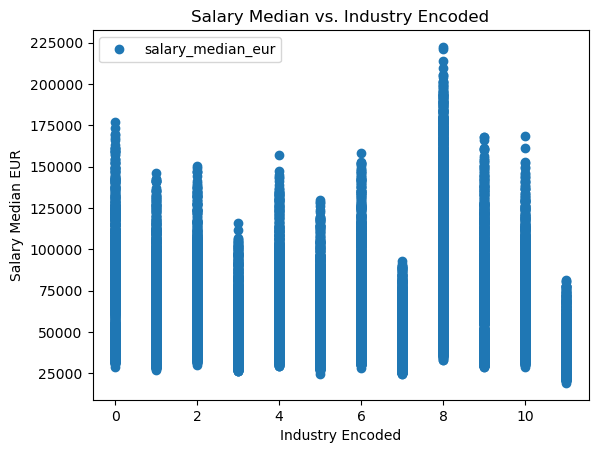

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. Salary Median vs. Industry Encoded
ax = Jobmarket01.plot(x='industry_encoded', y='salary_median_eur', style='o')
plt.title('Salary Median vs. Industry Encoded')
plt.xlabel('Industry Encoded')
plt.ylabel('Salary Median EUR')
plt.show()

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.
# 1. Salary Median vs. Industry Encoded
X1 = Jobmarket01['industry_encoded'].values.reshape(-1,1)
y1 = Jobmarket01['salary_median_eur'].values.reshape(-1,1)

In [29]:
X1

array([[8],
       [7],
       [8],
       ...,
       [2],
       [8],
       [3]], shape=(30000, 1))

In [30]:
y1

array([[54566],
       [80408],
       [44534],
       ...,
       [62890],
       [48802],
       [68090]], shape=(30000, 1))

In [45]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#### Salary Median vs. Job_title_encoded

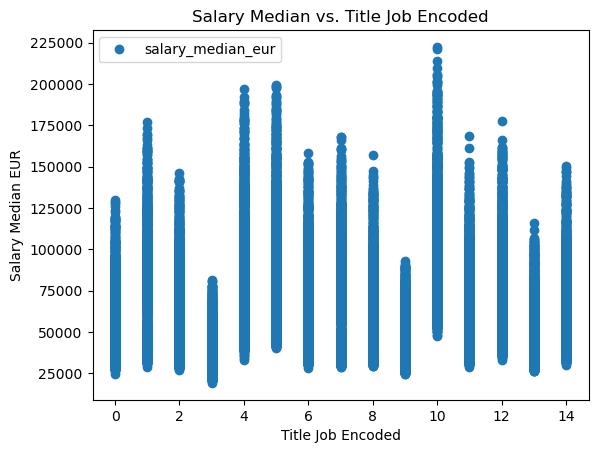

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 2. Salary Median vs. Title Job Encoded
ax = Jobmarket01.plot(x='job_title_encoded', y='salary_median_eur', style='o')
plt.title('Salary Median vs. Title Job Encoded')
plt.xlabel('Title Job Encoded')
plt.ylabel('Salary Median EUR')
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.
# 2. salary_median_eur vs. title_job_encoded
X2 = Jobmarket01['job_title_encoded'].values.reshape(-1,1)
y2 = Jobmarket01['salary_median_eur'].values.reshape(-1,1)

In [33]:
X2

array([[ 4],
       [ 9],
       [ 4],
       ...,
       [14],
       [ 5],
       [13]], shape=(30000, 1))

In [34]:
y2

array([[54566],
       [80408],
       [44534],
       ...,
       [62890],
       [48802],
       [68090]], shape=(30000, 1))

In [44]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#### Salary Median vs. Experience_level_encoded

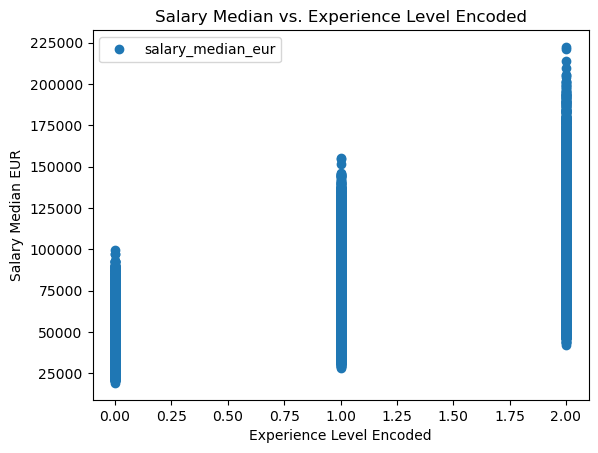

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 3. Salary Median vs. Experience Level Encoded
ax = Jobmarket01.plot(x='experience_level_encoded', y='salary_median_eur', style='o')
plt.title('Salary Median vs. Experience Level Encoded')
plt.xlabel('Experience Level Encoded')
plt.ylabel('Salary Median EUR')
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.
# 3. salary_median_eur vs. experience_level_encoded
X3 = Jobmarket01['experience_level_encoded'].values.reshape(-1,1)
y3 = Jobmarket01['salary_median_eur'].values.reshape(-1,1)

In [36]:
X3

array([[0],
       [2],
       [0],
       ...,
       [1],
       [0],
       [1]], shape=(30000, 1))

In [37]:
y3

array([[54566],
       [80408],
       [44534],
       ...,
       [62890],
       [48802],
       [68090]], shape=(30000, 1))

In [43]:
# Split data into a training set and a test set.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

#### Salary Median vs. remote_availability_encoded

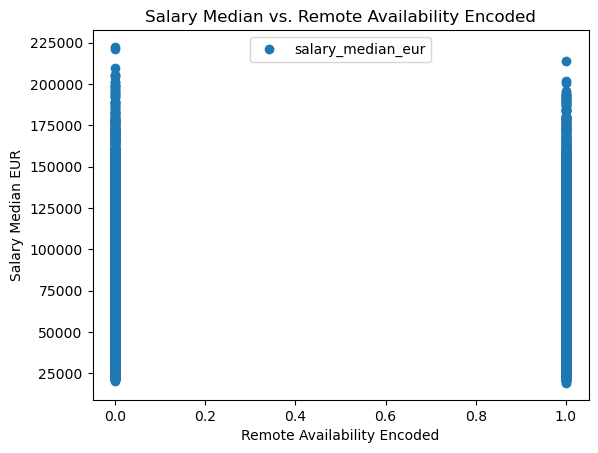

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 4. Salary Median vs. Remote Availability Encoded
ax = Jobmarket01.plot(x='remote_availability_encoded', y='salary_median_eur', style='o')
plt.title('Salary Median vs. Remote Availability Encoded')
plt.xlabel('Remote Availability Encoded')
plt.ylabel('Salary Median EUR')
plt.show()

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.
# 4. salary_median_eur vs. remote_availiblity_encoded
X4 = Jobmarket01['remote_availability_encoded'].values.reshape(-1,1)
y4 = Jobmarket01['salary_median_eur'].values.reshape(-1,1)

In [40]:
X4

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(30000, 1))

In [41]:
y4

array([[54566],
       [80408],
       [44534],
       ...,
       [62890],
       [48802],
       [68090]], shape=(30000, 1))

In [42]:
# Split data into a training set and a test set.
# 4. Salary Median vs. Remote Availability Encoded
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

## 3. Regression Analysis

#### 3.1 Regression Salary Median vs. Industry_encoded

In [46]:
# Create a regression object.

regression1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [48]:
# Fit the regression object onto the training set.

regression1.fit(X1_train, y1_train)

LinearRegression()

In [51]:
# Predict the values of y using X.
# apply the predict function on the regression1 model using the test data, and put the predected values in the new array y1predectid 
y1_predicted = regression1.predict(X1_test)

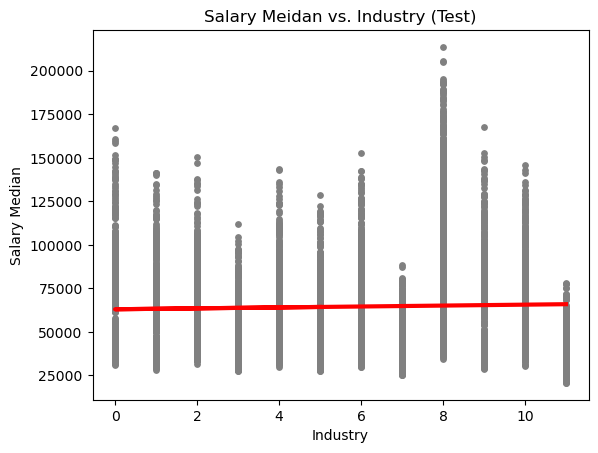

In [77]:
# Create a plot that shows the regression line from the model on the test set.
# 3.1 Regression Salary Median vs. Industry_encoded
plot_test1 = plt
plot_test1.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test1.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test1.title('Salary Meidan vs. Industry (Test)')
plot_test1.xlabel('Industry')
plot_test1.ylabel('Salary Median')

# Save plot 
plot_test1.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\salary vs. Industry.TestModel.png')
plot_test1.show()

In [54]:
# Create objects that contain the model summary statistics.

rmse1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2_1 = r2_score(y1_test, y1_predicted) # This is the R2 score. 

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[264.3248292]]
Mean squared error:  861079269.7450324
R2 score:  0.0015073840369745906


In [56]:
y1_predicted

array([[65935.05827872],
       [63820.45964513],
       [65142.08379112],
       ...,
       [65670.73344952],
       [64613.43413273],
       [64349.10930353]], shape=(9000, 1))

3.1 Regression Salary Median vs. Industry_encoded

Slope: [[264.3248292]]
Mean squared error:  861079269.7450324
R2 score:  0.0015073840369745906

The slope is positive but minimal, indicating a weak direct relationship. For every increase in industry encoding, the model predicts that the median salary rises by about €264. This effect is too small to be meaningful. R² Score: 0.00151 (0.15%) — industry explains less than 1% of the variation in salaries, showing that it is not a reliable predictor. Salary differences are largely influenced by other variables.


#### 3.2 Regression Salary Median vs. Job_title_encoded

In [57]:
# Create a regression object.

regression2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [58]:
# Fit the regression object onto the training set.

regression2.fit(X2_train, y2_train)

LinearRegression()

In [59]:
# Predict the values of y using X.

y2_predicted = regression2.predict(X2_test)

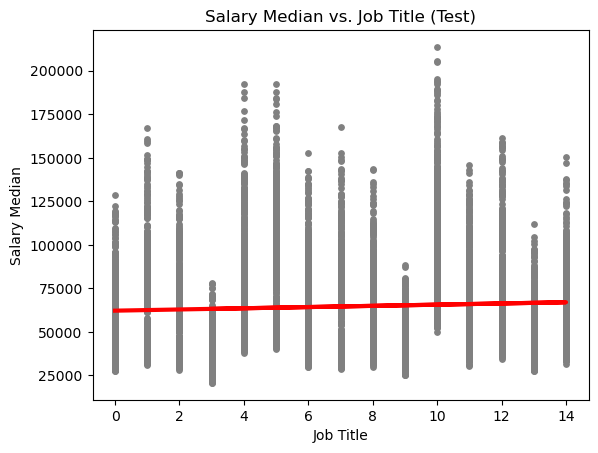

In [60]:
# Create a plot that shows the regression line from the model on the test set.
# 2. Salary Median vs. Title Job (Test)
plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth = 3)
plot_test2.title('Salary Median vs. Job Title (Test)')
plot_test2.xlabel('Job Title')
plot_test2.ylabel('Salary Median')
plot_test2.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\salary vs. TitleJob.TestModel.png')
plot_test2.show()

In [61]:
# Create objects that contain the model summary statistics.

rmse2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2_2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[345.20832428]]
Mean squared error:  860800954.547599
R2 score:  0.0018301135222981157


In [63]:
y2_predicted

array([[63255.18372403],
       [66707.26696686],
       [63945.60037259],
       ...,
       [66016.8503183 ],
       [64290.80869688],
       [62219.55875117]], shape=(9000, 1))

2. Salary Median vs. Title Job (Test)
 
Slope: [[345.20832428]]
Mean squared error:  860800954.547599
R2 score:  0.0018301135222981157

The slope is positive but very small, suggesting only a weak relationship. For every increase in job title encoding, the model predicts that the median salary increases by about €345. This effect is negligible in practical terms. R² Score: 0.00183 (0.18%) — job title encoding explains less than 1% of the variation in salaries, meaning it is not a strong predictor. Most of the variation is driven by other factors.

#### 3.3 Regression Salary Median vs. Experience_level_encoded

In [64]:
# Create a regression object.

regression3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [65]:
# Fit the regression object onto the training set.

regression3.fit(X3_train, y3_train)

LinearRegression()

In [66]:
# Predict the values of y using X.

y3_predicted = regression3.predict(X3_test)

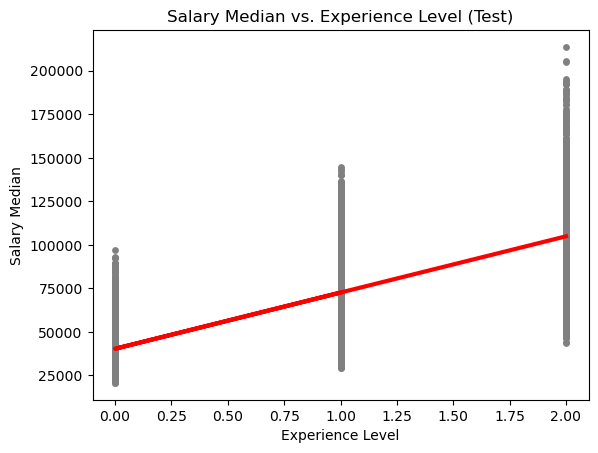

In [67]:
# Create a plot that shows the regression line from the model on the test set.
# 3. Salary Median vs. Experience Level (Test)
plot_test3 = plt
plot_test3.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test3.plot(X3_test, y3_predicted, color='red', linewidth = 3)
plot_test3.title('Salary Median vs. Experience Level (Test)')
plot_test3.xlabel('Experience Level')
plot_test3.ylabel('Salary Median')
plot_test3.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\salary vs. ExperienceLevel.TestModel.png')
plot_test3.show()

In [68]:
# Create objects that contain the model summary statistics.

rmse3 = mean_squared_error(y3_test, y3_predicted) # This is the mean squared error
r2_3 = r2_score(y3_test, y3_predicted) # This is the R2 score. 

In [69]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[32285.21306129]]
Mean squared error:  371969009.1934234
R2 score:  0.5686711757017553


In [61]:
y3_predicted

array([[41834.89648517],
       [55522.35471258],
       [43138.4639354 ],
       ...,
       [44442.03138563],
       [52915.21981212],
       [35968.84295913]], shape=(9000, 1))

3. Salary Median vs. Experience Level (Test)

Slope: [[32285.21306129]]
Mean squared error:  371969009.1934234
R2 score:  0.5686711757017553

The slope is strongly positive, suggesting a direct relationship. For every increase in experience level, the model predicts that the median salary rises by about €32,285. This indicates that higher experience levels are associated with significantly higher salaries. R² Score: 0.5687 (56.9%) — experience level explains a substantial portion of the variation in salaries, making it a meaningful predictor compared to other variables.

#### Salary Median vs. Remote Availability_encoded

In [70]:
# Create a regression object.

regression4 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [71]:
# Fit the regression object onto the training set.

regression4.fit(X4_train, y4_train)

LinearRegression()

In [72]:
# Predict the values of y using X.

y4_predicted = regression4.predict(X4_test)

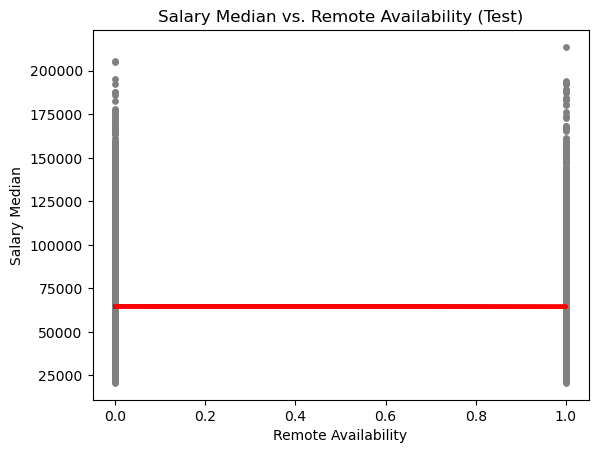

In [73]:
# 4. Salary Median vs. Remote Availability (Test)
plot_test4 = plt
plot_test4.scatter(X4_test, y4_test, color='gray', s = 15)
plot_test4.plot(X4_test, y4_predicted, color='red', linewidth = 3)
plot_test4.title('Salary Median vs. Remote Availability (Test)')
plot_test4.xlabel('Remote Availability')
plot_test4.ylabel('Salary Median')
plot_test4.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\salary vs. RemoteAvailability.TestModel.png')
plot_test4.show()

In [74]:
# Create objects that contain the model summary statistics.

rmse4 = mean_squared_error(y4_test, y4_predicted) # This is the mean squared error
r2_4 = r2_score(y4_test, y4_predicted) # This is the R2 score. 

In [75]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression4.coef_)
print('Mean squared error: ', rmse4)
print('R2 score: ', r2_4)

Slope: [[-164.06774673]]
Mean squared error:  862708248.4863988
R2 score:  -0.00038155151398422404


In [76]:
y4_predicted

array([[64679.86557944],
       [64515.79783271],
       [64515.79783271],
       ...,
       [64515.79783271],
       [64679.86557944],
       [64679.86557944]], shape=(9000, 1))

4. Salary Median vs. Remote Availability (Test)
   
Slope: [[-164.06774673]]
Mean squared error:  862708248.4863988
R2 score:  -0.00038155151398422404

The slop is negative suggesting a inverse relationship. For every additional remote availability, the model predicts that the median salary decreases by about €-164. This suggests that when there are more remote job available, salaries tend to be lower. R² Score: -0.00038 (-0.3%) The remote job availability explains only about 0.3% of the variation in salaries or even it is misleading predictore because ofthe negative R² Score . Most of the variation is due to other factors.